In [32]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

import joblib
from joblib import dump, load


# 1. Loadind data and quick EDA

In [2]:
data_pricing = pd.read_csv("https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv")

In [3]:
data_pricing.shape

(4843, 15)

In [4]:
data_pricing

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


In [5]:
data_pricing.describe(include='all')

,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [6]:
data_pricing.isnull().sum()

Unnamed: 0                   0
model_key                    0
mileage                      0
engine_power                 0
fuel                         0
paint_color                  0
car_type                     0
private_parking_available    0
has_gps                      0
has_air_conditioning         0
automatic_car                0
has_getaround_connect        0
has_speed_regulator          0
winter_tires                 0
rental_price_per_day         0
dtype: int64

In [7]:
data_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 4843 non-null   int64 
 1   model_key                  4843 non-null   object
 2   mileage                    4843 non-null   int64 
 3   engine_power               4843 non-null   int64 
 4   fuel                       4843 non-null   object
 5   paint_color                4843 non-null   object
 6   car_type                   4843 non-null   object
 7   private_parking_available  4843 non-null   bool  
 8   has_gps                    4843 non-null   bool  
 9   has_air_conditioning       4843 non-null   bool  
 10  automatic_car              4843 non-null   bool  
 11  has_getaround_connect      4843 non-null   bool  
 12  has_speed_regulator        4843 non-null   bool  
 13  winter_tires               4843 non-null   bool  
 14  rental_p

In [8]:
non_numeric_data = data_pricing.select_dtypes(exclude=['number'])

for column in non_numeric_data.columns:
    print(f"Value counts pour {column}:")
    print(data_pricing[column].value_counts())
    print("\n")


Value counts pour model_key:
model_key
Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
PGO             33
Ferrari         33
Opel            33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mazda            1
Honda            1
Mini             1
Yamaha           1
Name: count, dtype: int64


Value counts pour fuel:
fuel
diesel           4641
petrol            191
hybrid_petrol       8
electro             3
Name: count, dtype: int64


Value counts pour paint_color:
paint_color
black     1633
grey      1175
blue       710
white      538
brown      341
silver     329
red         52
beige       41
green       18
orange       6
Name: count, dtype: int64


Value counts pour car_type:
car_typ

Some features contain criteria with too few values to be considered in a prediction model: 
- paint color = Orange or green, 
- fuel = hybrid_petrol or electro ,
- model differents than Citroën, Renault, BMW, Peugeot, Audi, Nissan, Mitsubishi, Mercedes

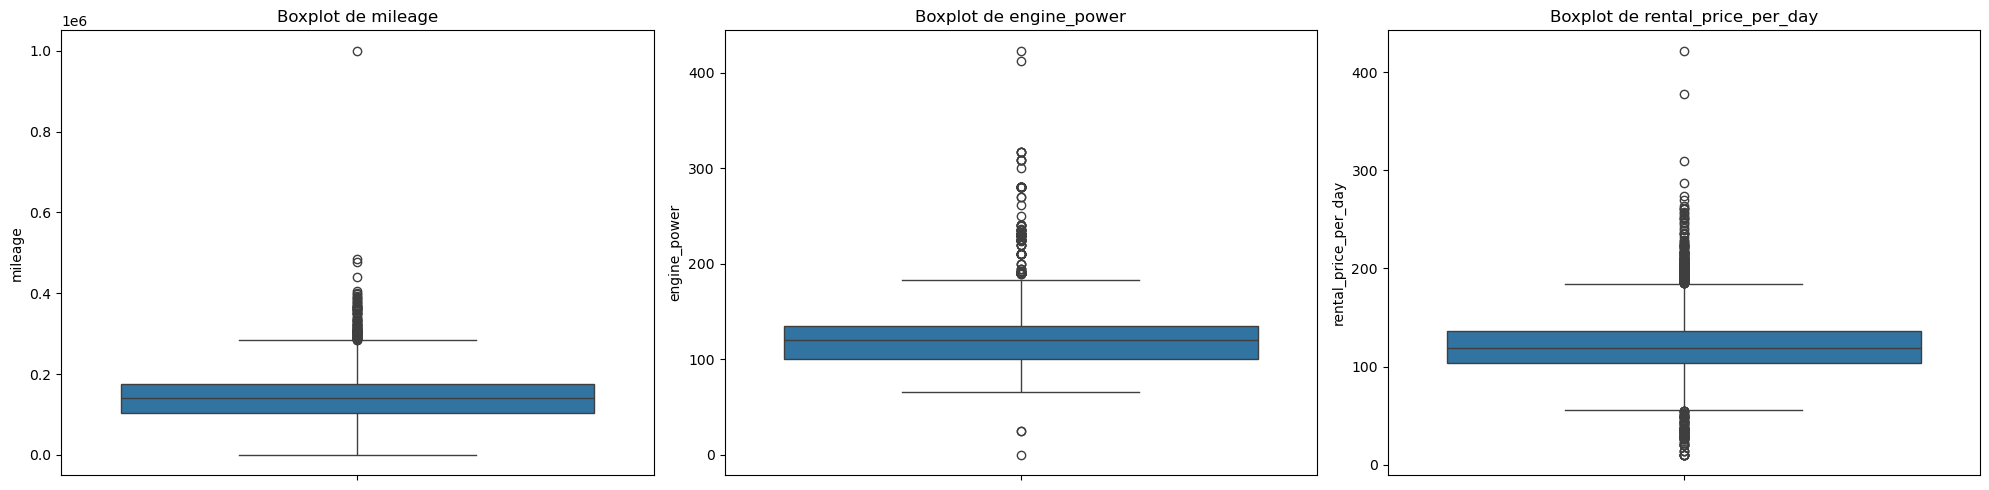

In [9]:
%matplotlib inline

numerical_features = ['mileage','engine_power', 'rental_price_per_day']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data_pricing, y=feature, orient="v", ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


We notice some outliers in our numerical features

# 2. Data engineering

In [10]:
data_pricing_eng=data_pricing.copy()

In [11]:
data_pricing_eng= data_pricing_eng.drop("Unnamed: 0", axis = 1)

In [12]:
# Drop outliers in numerical features

print('Dropping outliers in Mileage, Engine Power and Rental price per day.')

for i in data_pricing_eng[numerical_features]:
    outlier_min = data_pricing_eng[i].mean() - 3*data_pricing_eng[i].std()
    outlier_max = data_pricing_eng[i].mean() + 3*data_pricing_eng[i].std()
    to_keep = (data_pricing_eng[i] > outlier_min) & (data_pricing_eng[i] < outlier_max)
    data_pricing_eng = data_pricing_eng.loc[to_keep,:]

print('Number of lines remaining : ', data_pricing_eng.shape[0])

Dropping outliers in Mileage, Engine Power and Rental price per day.
Number of lines remaining :  4705


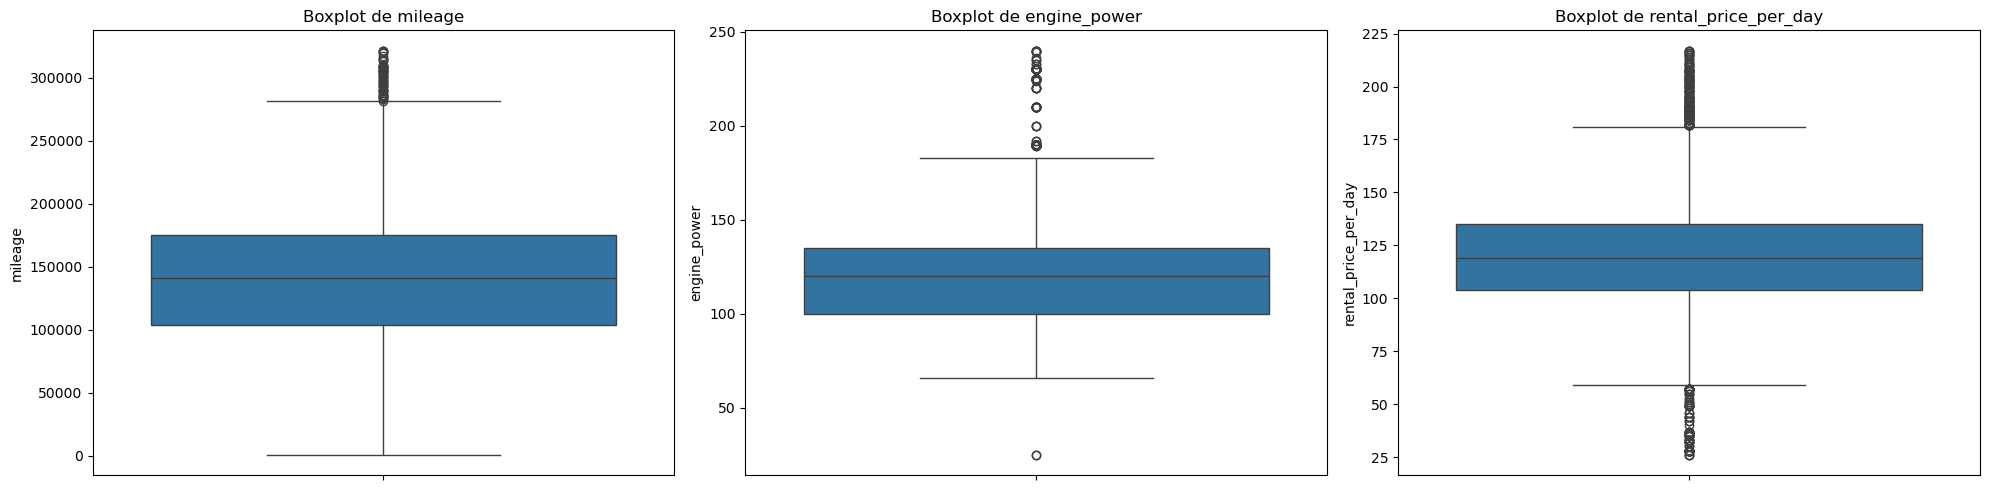

In [13]:
%matplotlib inline

numerical_features = ['mileage','engine_power', 'rental_price_per_day']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, feature in enumerate(numerical_features):
    sns.boxplot(data=data_pricing_eng, y=feature, orient="v", ax=axes[i])
    axes[i].set_title(f'Boxplot de {feature}')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


In [14]:
# Group brand cars
value_counts = data_pricing_eng['model_key'].value_counts()
values_to_replace = value_counts[value_counts <= 30].index
data_pricing_eng.loc[data_pricing_eng['model_key'].isin(values_to_replace), 'model_key'] = 'other'
data_pricing_eng["model_key"].value_counts()

model_key
Citroën       947
Renault       902
BMW           811
Peugeot       627
Audi          514
Nissan        273
Mitsubishi    217
Mercedes       97
other          69
Volkswagen     61
Toyota         45
SEAT           44
PGO            33
Opel           33
Ferrari        32
Name: count, dtype: int64

In [15]:
# exclude rare options
columns_with_rare = ["fuel","paint_color"]
for col in columns_with_rare:
    value_counts = data_pricing_eng[col].value_counts()
    valeurs_to_exclude = value_counts[value_counts < 30].index
    data_pricing_eng = data_pricing_eng[~data_pricing_eng[col].isin(valeurs_to_exclude)]

In [16]:
non_numeric_data = data_pricing_eng.select_dtypes(exclude=['number'])

for column in non_numeric_data.columns:
    print(f"Value counts pour {column}:")
    print(data_pricing_eng[column].value_counts())
    print("\n")


Value counts pour model_key:
model_key
Citroën       946
Renault       899
BMW           805
Peugeot       623
Audi          510
Nissan        271
Mitsubishi    216
Mercedes       97
other          61
Volkswagen     61
Toyota         45
SEAT           43
Opel           33
PGO            32
Ferrari        32
Name: count, dtype: int64


Value counts pour fuel:
fuel
diesel    4508
petrol     166
Name: count, dtype: int64


Value counts pour paint_color:
paint_color
black     1579
grey      1134
blue       688
white      524
brown      340
silver     317
red         51
beige       41
Name: count, dtype: int64


Value counts pour car_type:
car_type
estate         1579
sedan          1118
suv            1000
hatchback       685
subcompact      113
coupe            93
van              44
convertible      42
Name: count, dtype: int64


Value counts pour private_parking_available:
private_parking_available
True     2543
False    2131
Name: count, dtype: int64


Value counts pour has_gps:
has_gp

In [17]:
data_pricing_eng.shape

(4674, 14)

In [18]:
print("number of lines removed: ", (data_pricing.shape[0] - data_pricing_eng.shape[0]))

number of lines removed:  169


# 3. Preprocessing

In [19]:
data_pricing_eng.columns

Index(['model_key', 'mileage', 'engine_power', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires', 'rental_price_per_day'],
      dtype='object')

In [20]:
# Separate target variable Y from features X
target_name = "rental_price_per_day"

Y = data_pricing_eng.loc[:, target_name]
X = data_pricing_eng.drop(target_name, axis=1)

# divide dataset into train set & test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['number']).columns.tolist()
categoric_features = X.select_dtypes(exclude=['number']).columns.tolist()
print("Numeric Features:")
print(numeric_features)
print("\nCategoric Features:")
print(categoric_features)


Numeric Features:
['mileage', 'engine_power']

Categoric Features:
['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


In [21]:
preprocessor = ColumnTransformer([
  ('num', Pipeline([
    ('num_scaler', StandardScaler())
  ]), numeric_features),
  ('cat', Pipeline([
    ('cat_encoder', OneHotEncoder(drop="if_binary")) 
  ]), categoric_features)
])

preprocessor.fit(X_train)

X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

# 4. Model training

In [29]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train, Y_train)
print(f"R2 Train: {Linear_regression.score(X_train, Y_train)}\nR2 Test: {Linear_regression.score(X_test, Y_test)}")
print()
# Predictions on train and test
Y_train_pred = Linear_regression.predict(X_train)
Y_test_pred = Linear_regression.predict(X_test)

mae_train = mean_absolute_error(Y_train, Y_train_pred)
mae_test = mean_absolute_error(Y_test, Y_test_pred)
print(f"MAE Train: {mae_train}\nMAE Test: {mae_test}")
print()
# root_mean_squared_error
print("RMSE Train : ", root_mean_squared_error(Y_train, Y_train_pred))
print("RMSE Test : ", root_mean_squared_error(Y_test, Y_test_pred))


R2 Train: 0.7092532535094124
R2 Test: 0.6753914275210233

MAE Train: 11.461296516620408
MAE Test: 11.85160579824289

RMSE Train :  16.060879581239384
RMSE Test :  16.459739101590074


# 5. Save model and preprocessor

In [36]:
joblib.dump(preprocessor, r"preprocessor.joblib")
joblib.dump(Linear_regression, r"model.joblib")

['model.joblib']